In [1]:
import pandas as pd
import numpy as np
from datetime import date
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def printmd(string):
    display(Markdown(string))


In [3]:
fn = 'RemanufactureProcessLog.csv'
events = pd.read_csv(fn)

events.columns = ['core', 'action', 'resource', 'datetime']
events['datetime'] = pd.to_datetime(events['datetime'])
events.head()


,core,action,resource,datetime
0,core 0,Core Inspection & Cleaning,Technician 1,2017-01-02 11:40:11
1,core 0,Mechanical test,Mechanical Test Cell,2017-01-02 12:47:33
2,core 0,Electrical test,Electrical Department,2017-01-02 12:53:50
3,core 0,Disassembly and Component Inspection,Technician 1,2017-01-02 16:21:06
4,core 0,Rework and Reassemble,Technician 6,2017-01-05 13:23:09


In [4]:
print('{} has {} rows and {} columns.'.format(fn, events.shape[0], events.shape[1]))


RemanufactureProcessLog.csv has 690 rows and 4 columns.


In [5]:
## Get the case start times to get the time deltas for the 'age' of each activity with respect to start
case_starts_ends = events.pivot_table(index='core', aggfunc={'datetime': ['min', 'max']})
case_starts_ends = case_starts_ends.reset_index()
case_starts_ends.columns = ['core', 'caseend', 'casestart']
events = events.merge(case_starts_ends, on='core')
events['relativetime'] = events['datetime'] - events['casestart']
events.head()

,core,action,resource,datetime,caseend,casestart,relativetime
0,core 0,Core Inspection & Cleaning,Technician 1,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 00:00:00
1,core 0,Mechanical test,Mechanical Test Cell,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22
2,core 0,Electrical test,Electrical Department,2017-01-02 12:53:50,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:13:39
3,core 0,Disassembly and Component Inspection,Technician 1,2017-01-02 16:21:06,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 04:40:55
4,core 0,Rework and Reassemble,Technician 6,2017-01-05 13:23:09,2017-01-09 08:29:28,2017-01-02 11:40:11,3 days 01:42:58


In [6]:
events['action'] = events['action'].apply(lambda x: x.strip())

In [7]:
delimiter = '___'

makeEventString = lambda x: delimiter.join(x)
makeEventString.__name__ = 'makeEventString'

numEvents = lambda x: len(x)
numEvents.__name__ = 'numEvents'


caselogs = events.pivot_table(index='core', aggfunc={'action': [makeEventString, numEvents]})
caselogs = caselogs.reset_index()
caselogs.columns = ['core', 'action_sequence', 'numactions']

events = pd.merge(events, caselogs, on='core')
events['caselength'] = events['caseend'] - events['casestart']

events.head()


,core,action,resource,datetime,caseend,casestart,relativetime,action_sequence,numactions,caselength
0,core 0,Core Inspection & Cleaning,Technician 1,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 00:00:00,Core Inspection & Cleaning___Mechanical test__...,6,6 days 20:49:17
1,core 0,Mechanical test,Mechanical Test Cell,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22,Core Inspection & Cleaning___Mechanical test__...,6,6 days 20:49:17
2,core 0,Electrical test,Electrical Department,2017-01-02 12:53:50,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:13:39,Core Inspection & Cleaning___Mechanical test__...,6,6 days 20:49:17
3,core 0,Disassembly and Component Inspection,Technician 1,2017-01-02 16:21:06,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 04:40:55,Core Inspection & Cleaning___Mechanical test__...,6,6 days 20:49:17
4,core 0,Rework and Reassemble,Technician 6,2017-01-05 13:23:09,2017-01-09 08:29:28,2017-01-02 11:40:11,3 days 01:42:58,Core Inspection & Cleaning___Mechanical test__...,6,6 days 20:49:17


In [8]:
## Get day of week
events['weekday'] = events['datetime'].apply(lambda x: x.weekday())
events['date'] = events['datetime'].apply(lambda x: x.date())
events['startdate'] = events['casestart'].apply(lambda x: x.date())
events['hour'] = events['datetime'].apply(lambda x: x.time().hour)
## Get relative times in more friendly terms
events['relativetime_s'] = events['relativetime'].dt.seconds + 86400*events['relativetime'].dt.days
events['relativedays'] = events['relativetime'].dt.days



In [9]:
events.head()

,core,action,resource,datetime,caseend,casestart,relativetime,action_sequence,numactions,caselength,weekday,date,startdate,hour,relativetime_s,relativedays
0,core 0,Core Inspection & Cleaning,Technician 1,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 00:00:00,Core Inspection & Cleaning___Mechanical test__...,6,6 days 20:49:17,0,2017-01-02,2017-01-02,11,0,0
1,core 0,Mechanical test,Mechanical Test Cell,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22,Core Inspection & Cleaning___Mechanical test__...,6,6 days 20:49:17,0,2017-01-02,2017-01-02,12,4042,0
2,core 0,Electrical test,Electrical Department,2017-01-02 12:53:50,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:13:39,Core Inspection & Cleaning___Mechanical test__...,6,6 days 20:49:17,0,2017-01-02,2017-01-02,12,4419,0
3,core 0,Disassembly and Component Inspection,Technician 1,2017-01-02 16:21:06,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 04:40:55,Core Inspection & Cleaning___Mechanical test__...,6,6 days 20:49:17,0,2017-01-02,2017-01-02,16,16855,0
4,core 0,Rework and Reassemble,Technician 6,2017-01-05 13:23:09,2017-01-09 08:29:28,2017-01-02 11:40:11,3 days 01:42:58,Core Inspection & Cleaning___Mechanical test__...,6,6 days 20:49:17,3,2017-01-05,2017-01-02,13,265378,3


# Questions

## What is the minimum number of events per core?

In [10]:
printmd('**Minimum number of events per case**: {}'.format(min(events['core'].value_counts())))

**Minimum number of events per case**: 6

## Core 26
* Which Technician assessed this core?
* Which Technician did the core assessment ?

In [11]:
first_tech = events[events['datetime']==min(events[events['core']=='core 26']['datetime'])]['resource'].values[0]
last_tech = events[events['datetime']==max(events[events['core']=='core 26']['datetime'])]['resource'].values[0]
printmd('**First Technician**: {}'.format(first_tech))
printmd('**Last Technician**: {}'.format(last_tech))


**First Technician**:  Technician 3

**Last Technician**:  Technician 2

## Which activity has the lowest occurrence overall in the event log?

In [12]:
printmd('**Activity with lowest occurrence**: {}'.format(events['action'].value_counts().sort_values().idxmin()))

**Activity with lowest occurrence**: Rework and Reassemble

# Visualisations

In [13]:

activities = list(events['action'].unique())
markers = ['*', '+', 'h', 'o', 'x', 'D', '^', 'v']
assert(len(activities)==len(markers))


In [14]:
cores = events['core'].unique()
selected_cores = cores[0:50]
coreX = events[events['core'].isin(selected_cores)]



## Simple scatter plots

### Date

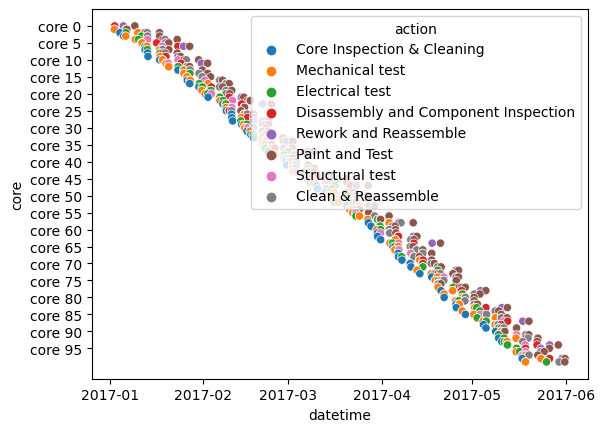

In [15]:
corenums = [int(e) for e in events['core'].apply(lambda x: x.strip('core'))]
resourcenums = [i for (i, e) in enumerate(events['resource'])]

ax = sns.scatterplot(x=events['datetime'], y=events['core'], hue=events['action'])
plt.yticks(np.arange(min(corenums), max(corenums)+1, 5));

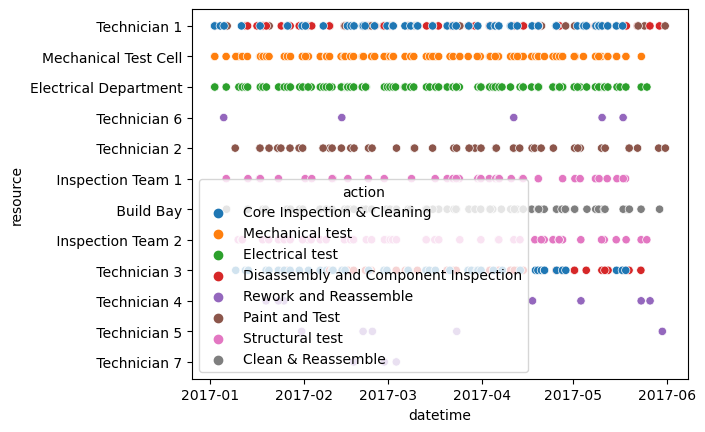

In [16]:
ax = sns.scatterplot(x=events['datetime'], y=events['resource'], hue=events['action'])

### Weekday

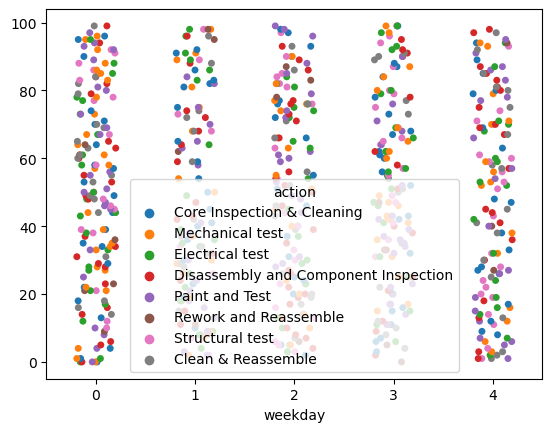

In [17]:
ax = sns.stripplot(x=events['weekday'], y=corenums, hue=events['action'], jitter=0.2)

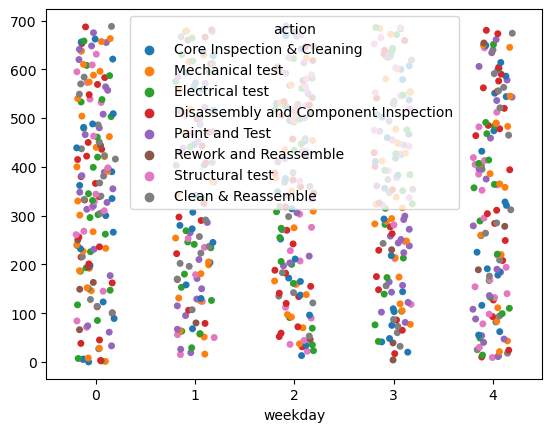

In [18]:
ax = sns.stripplot(x=events['weekday'], y=resourcenums, hue=events['action'], jitter=0.2)

### Hour

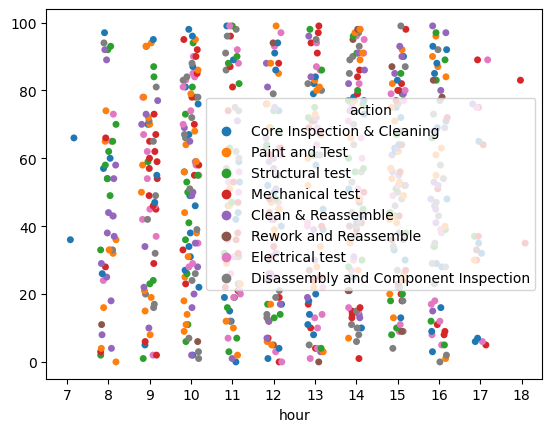

In [19]:
ax = sns.stripplot(x=events['hour'], y=corenums, hue=events['action'], jitter=0.2)


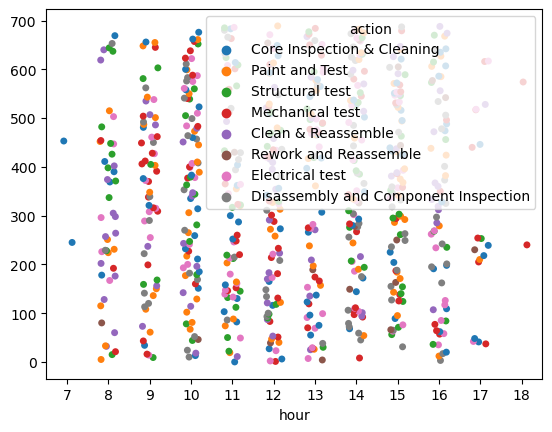

In [20]:
ax = sns.stripplot(x=events['hour'], y=resourcenums, hue=events['action'], jitter=0.2)

### Relative time 
Time since start of case

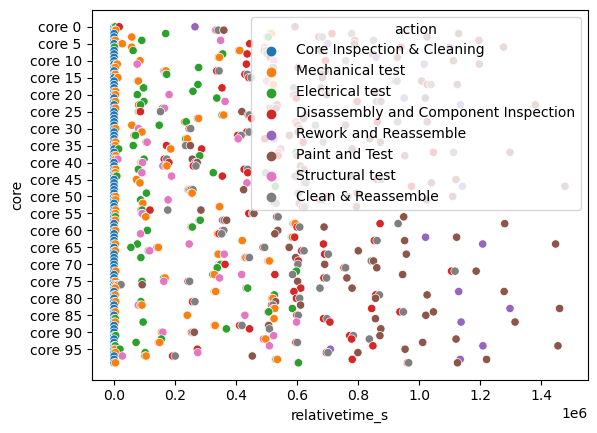

In [21]:
## Time in seconds
#ax = sns.scatterplot(x=events['relativetime'].dt.seconds, y=events['patient'], hue=events['action'])
#plt.yticks(np.arange(min(patientnums), max(patientnums)+1, 5));

## Time in hours
ax = sns.scatterplot(x=events['relativetime_s'], y=events['core'], hue=events['action'])
plt.yticks(np.arange(min(corenums), max(corenums)+1, 5));


In [22]:
ordered = events.sort_values(by=['caselength', 'core', 'relativetime_s'])

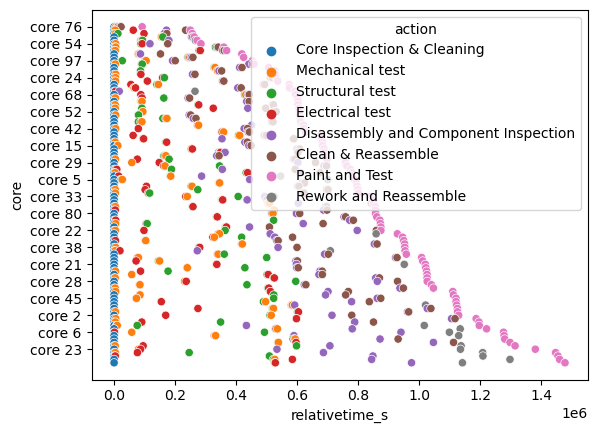

In [23]:
## Time in seconds
ax = sns.scatterplot(x=ordered['relativetime_s'], y=ordered['core'], hue=ordered['action'])
plt.yticks(np.arange(min(corenums), max(corenums)+1, 5));
plt.show()


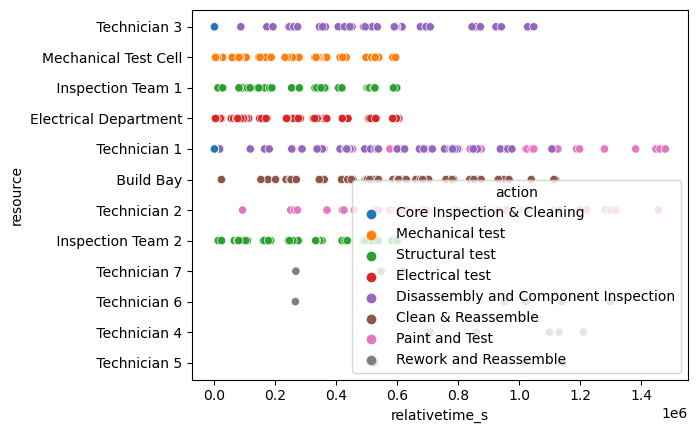

In [24]:
## Resources
ax = sns.scatterplot(x=ordered['relativetime_s'], y=ordered['resource'], hue=ordered['action'])
plt.show()


In [25]:
#pd.crosstab(events['action'], events['resource'])
pd.crosstab(events['action'], events['resource'], normalize='columns')
#pd.crosstab(events['action'], events['resource'], normalize='index')

resource,Build Bay,Inspection Team 1,Inspection Team 2,Technician 1,Technician 2,Technician 3,Technician 4,Technician 5,Technician 6,Technician 7,Electrical Department,Mechanical Test Cell
action,,,,,,,,,,,,
Clean & Reassemble,1.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
Core Inspection & Cleaning,0.0,0.0,0.0,0.335443,0.0,0.51087,0.0,0.0,0.0,0.0,0.0,0.0
Disassembly and Component Inspection,0.0,0.0,0.0,0.348101,0.0,0.48913,0.0,0.0,0.0,0.0,0.0,0.0
Electrical test,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,1.0,0.0
Mechanical test,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,1.0
Paint and Test,0.0,0.0,0.0,0.316456,1.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
Rework and Reassemble,0.0,0.0,0.0,0.000000,0.0,0.00000,1.0,1.0,1.0,1.0,0.0,0.0
Structural test,0.0,1.0,1.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


### Relative day

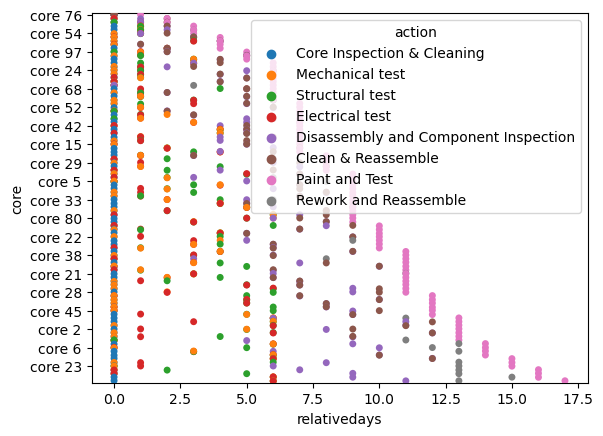

In [26]:
## Days
ax = sns.stripplot(x=ordered['relativedays'], y=ordered['core'], hue=ordered['action'])
plt.yticks(np.arange(min(corenums), max(corenums)+1, 5));
plt.show()


## Discrete event plot
* y-axis represents each patient case.
* x-axis represents time since case was initiated.
* Different marker shapes represent different types of cases.

In [28]:
## Widget libraries
from ipywidgets import widgets
from ipywidgets import interact, interact_manual

cores = events['core'].unique()

@interact
def getCaseData(x=cores):
    return events[events['core']==x]



interactive(children=(Dropdown(description='x', options=('core 0', 'core 1', 'core 2', 'core 3', 'core 4', 'co…

In [29]:
coreX = getCaseData(cores[10])

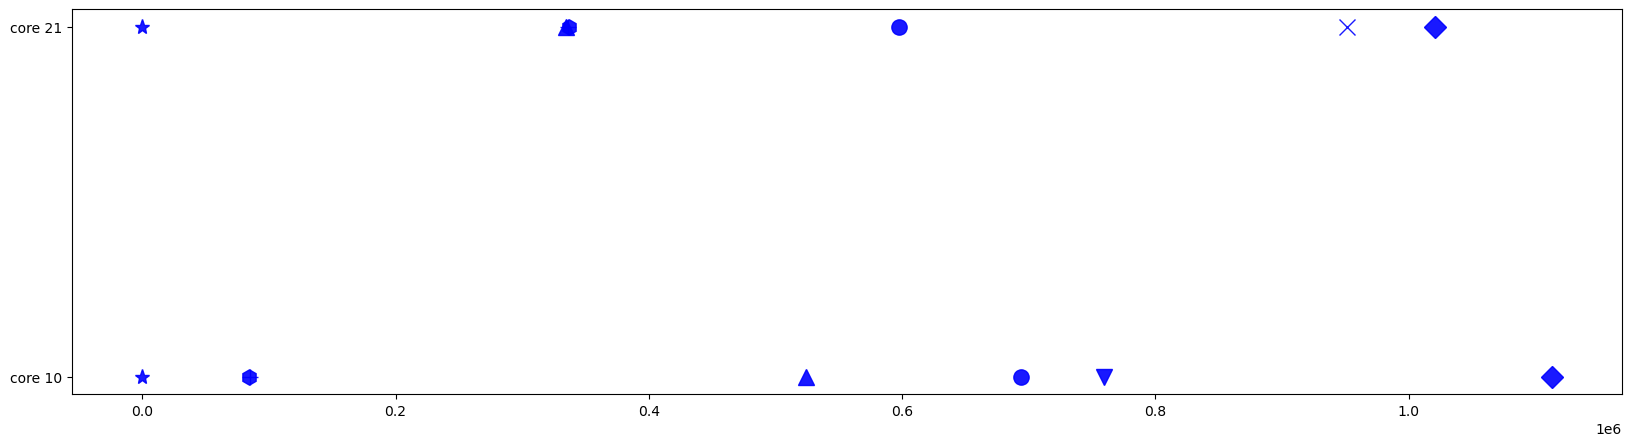

In [30]:
def getEventPlot(corelist=[cores[10], cores[21]]):
    fig, ax = plt.subplots(figsize=(20, 5))
    
    for x in corelist:
        coreX = getCaseData(x)
        
    
        for i in range(0, len(activities)):
            a = activities[i]
            marker = markers[i]
            selected = coreX[coreX['action']==a]
            ax.plot(selected['relativetime_s'], 
                selected['core'],
                marker=marker, markersize=11,
                alpha=0.9, color='blue', linewidth=0, 
                label=a);
    plt.show()

getEventPlot()


## Most frequent event sequence

In [31]:
most_frequent_event = events['action_sequence'].value_counts().idxmax()


printmd('**The most frequent event (sequence) has** {} **activities.**'.format(len(most_frequent_event.split(delimiter))))
printmd('**The activity sequence is**:  {}.'.format(', '.join(most_frequent_event.split(delimiter))))

**The most frequent event (sequence) has** 7 **activities.**

**The activity sequence is**:  Core Inspection & Cleaning, Mechanical test, Structural test, Electrical test, Disassembly and Component Inspection, Clean & Reassemble, Paint and Test.

## Filtering events

### Removing events that all patients share

**The following actions are common to all cases**: Core Inspection & Cleaning, Disassembly and Component Inspection, Electrical test, Mechanical test, Paint and Test

**The following actions are the ones that we wish to keep (not common to all cases)**: Clean & Reassemble, Rework and Reassemble, Structural test

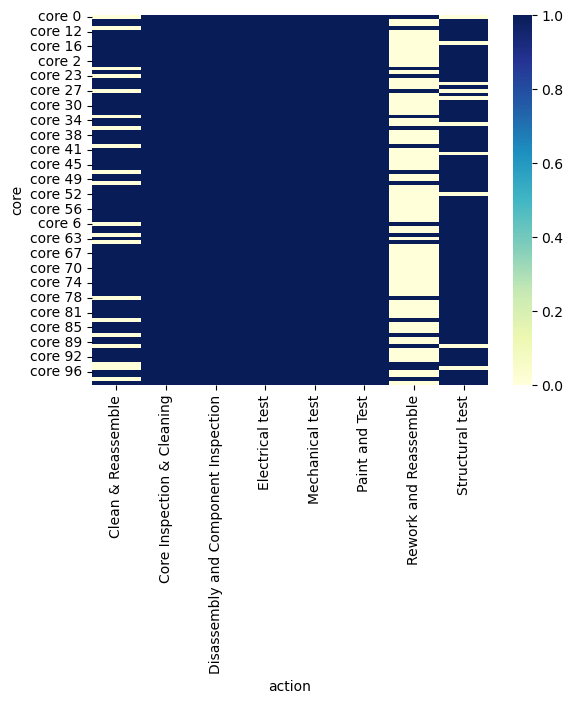

In [36]:
## Visualise which events are common to patients
core_events = pd.crosstab(events['core'], events['action'])
sns.heatmap(core_events, cmap="YlGnBu")

nunique = core_events.apply(pd.Series.nunique)
shared_actions = nunique[nunique==1].index
actions_to_keep = nunique[nunique>1].index
printmd('**The following actions are common to all cases**: {}'.format(', '.join(shared_actions)))
printmd('**The following actions are the ones that we wish to keep (not common to all cases)**: {}'.format(', '.join(actions_to_keep)))


In [37]:
#filtered = events[events['action']=='Structral test']
filtered = events[events['action'].isin(actions_to_keep)]
printmd('**The filtered data has** {} **rows and** {} **columns.**'.format(filtered.shape[0], filtered.shape[1]))

filtered = filtered[filtered['action']!='Structural test']
printmd('**The filtered data excluding Structural test has** {} **rows and** {} **columns.**'.format(filtered.shape[0], filtered.shape[1]))

filtered = filtered[~filtered['resource'].isin([' Technician 1', ' Technician 2'])]
printmd('**The filtered data excluding Technican 1 and Technician 2 has** {} **rows and** {} **columns.**'.format(filtered.shape[0], filtered.shape[1]))

patient_events = pd.crosstab(filtered['core'], filtered['action'])
#sns.heatmap(patient_events, cmap="YlGnBu")

**The filtered data has** 190 **rows and** 16 **columns.**

**The filtered data excluding Structural test has** 100 **rows and** 16 **columns.**

**The filtered data excluding Technican 1 and Technician 2 has** 100 **rows and** 16 **columns.**

In [38]:
printmd('**The filtered data has** {} **rows and** {} **columns.**'.format(filtered.shape[0], filtered.shape[1]))
printmd('**This amounts to** {} **cases with** {} **distinct actions.**'.format(core_events.shape[0], core_events.shape[1]))
printmd('**There are** {} **events.**'.format(np.sum(np.array(core_events))))

**The filtered data has** 100 **rows and** 16 **columns.**

**This amounts to** 100 **cases with** 8 **distinct actions.**

**There are** 690 **events.**

## Process Mining
* Check out this [introduction to process mining in Python](https://towardsdatascience.com/introduction-to-process-mining-5f4ce985b7e5).
* [Documentation for pm4py](https://pm4py.fit.fraunhofer.de/)

In [39]:
!pip install pm4py
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

In [40]:
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# viz
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter

In [41]:
eventlog = events.copy()
### Specify which columns correspond to case (case:concept:name), 
###event (concept:name) and timestamp (time:timestamp) - rename columns in accordance
###with pm4py

eventlog.rename(columns={'datetime': 'time:timestamp', 'core': 'case:concept:name', 'action': 'concept:name', 'resource': 'org:resource'}, inplace=True)

## Convert to log format
log = log_converter.apply(eventlog)


### Alpha miner

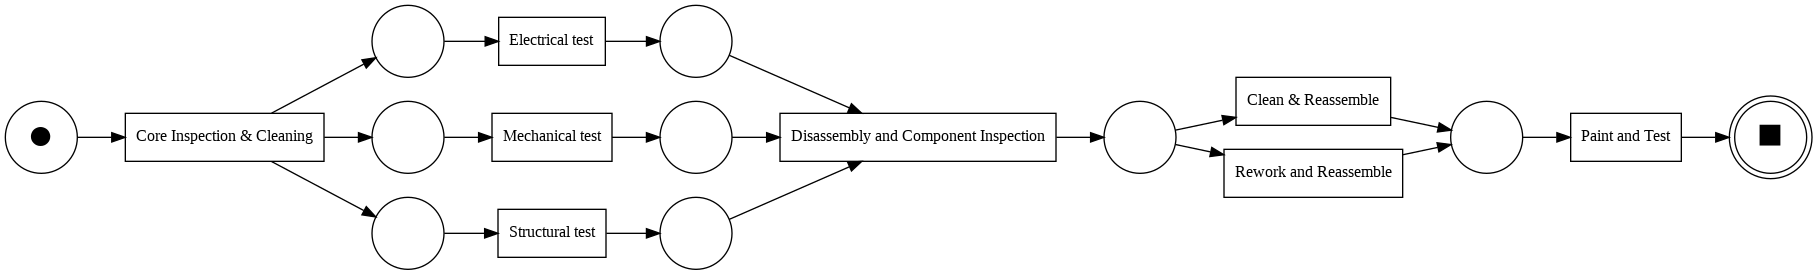

In [42]:
# alpha miner
net, initial_marking, final_marking = alpha_miner.apply(log)

# Visualise
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

In [43]:
# add information about frequency to the viz 
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)

# save the Petri net
pn_visualizer.save(gviz, "alpha_miner_core_petri_net.png")

replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

### Directly-follows graph

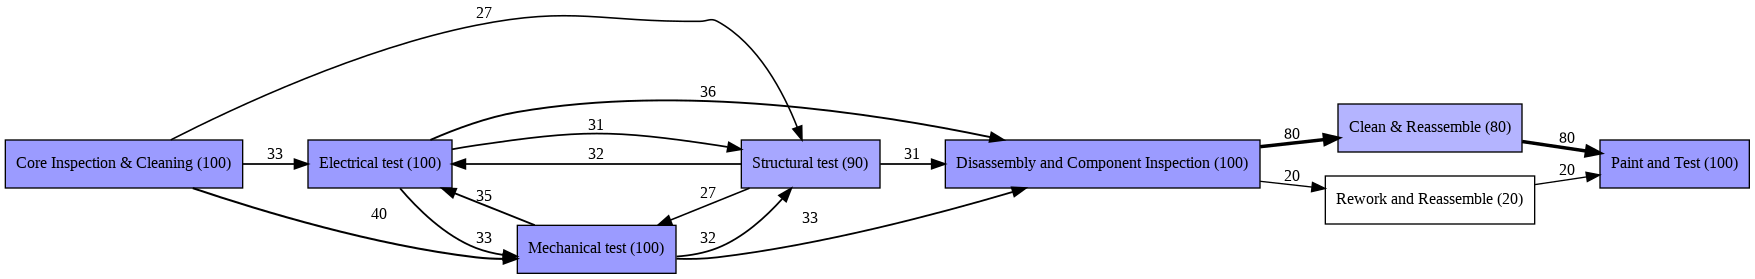

In [44]:
#Create graph from log
dfg = dfg_discovery.apply(log)

# viz
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

With average times between nodes (performance)

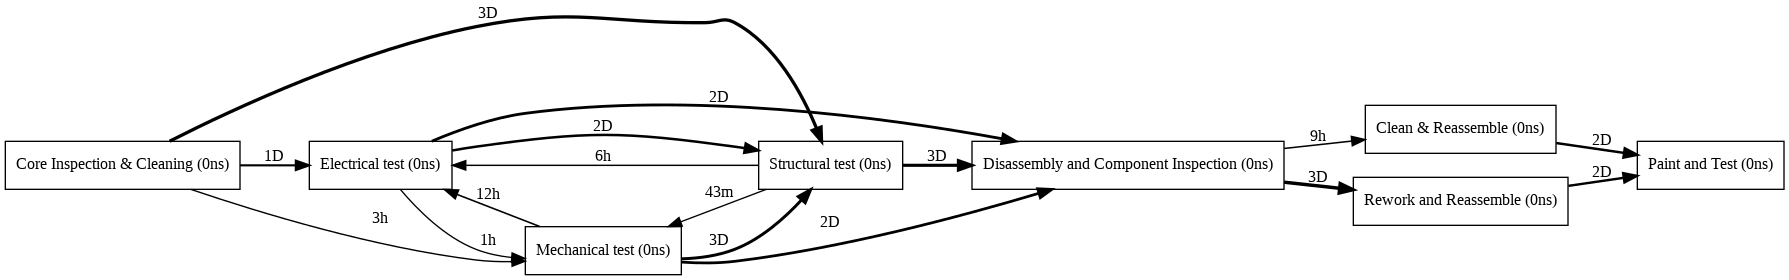

In [45]:
# creatig the graph from log
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)

# viz
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)

### Heuristic miner

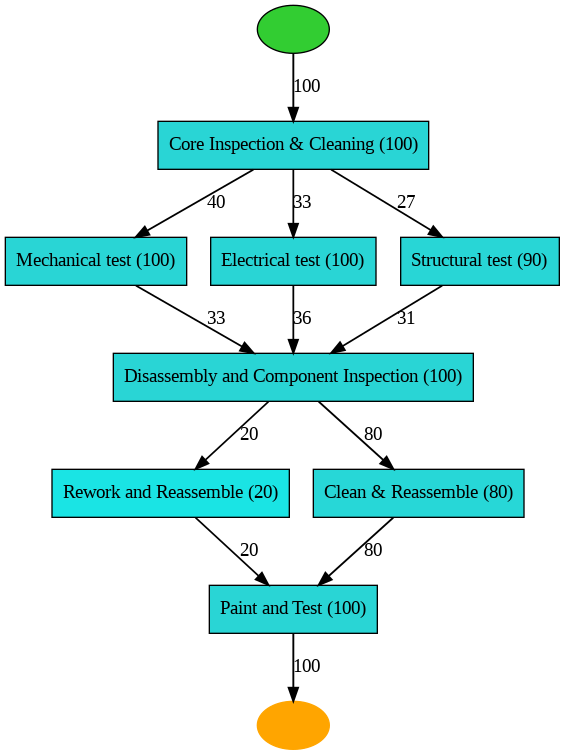

In [46]:
# heuristics miner
heu_net = heuristics_miner.apply_heu(log)

# viz
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

Petri-net of heuristic miner output

replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

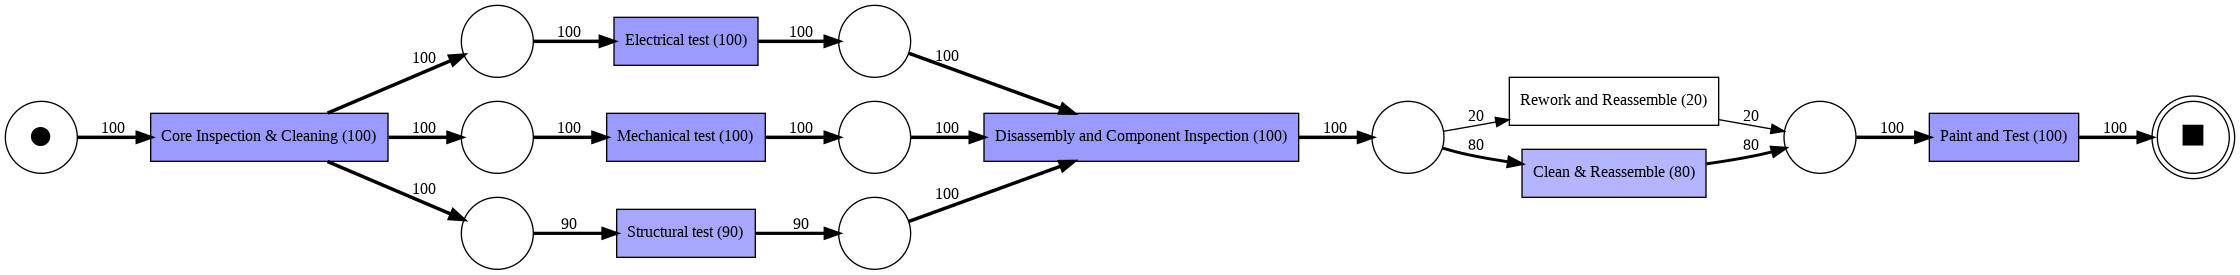

In [47]:
# heuristics miner
net, im, fm = heuristics_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net, im, fm)
gviz = pn_visualizer.apply(net, im, fm, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)
#pn_visualizer.view(gviz)
pn_visualizer.view(gviz)